#                       TRIAL     SMS SPAM DETECTION

# Import Statements

In [2]:
import pandas as pd


In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from nltk.corpus import stopwords   #Stopword required to neglect them in the text

In [14]:
import nltk

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.svm import LinearSVC

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.metrics import f1_score, accuracy_score

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn import tree

# Reading the Dataset

In [5]:
data = pd.read_csv("newspam.csv", encoding='latin')
data.head()

,v1,v2
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...


# Code for Preprocessing Data

## Visualization of Data

In [ ]:
#plt.plot(data['v2'],data['v1'],'ro',color='red')

In [ ]:
#plt.show()

# Transforming the Data

# Map the Column v1 -  ham to 0 and spam to 1 respectively

In [6]:
data['mapped_data'] = data['v1'].map({'ham':0, 'spam':1})
data['mapped_data']

0       0
1       0
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      0
14      0
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      0
28      1
29      1
       ..
1542    1
1543    0
1544    1
1545    0
1546    1
1547    1
1548    1
1549    1
1550    1
1551    1
1552    0
1553    1
1554    0
1555    1
1556    0
1557    1
1558    1
1559    1
1560    1
1561    1
1562    1
1563    1
1564    1
1565    0
1566    0
1567    0
1568    0
1569    0
1570    0
1571    0
Name: mapped_data, Length: 1572, dtype: int64

# Head of the data - Verify Mapping

In [7]:
data.head()

,v1,v2,mapped_data
0,ham,"said kiss, kiss, i can't do the sound effects...",0
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.,0
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,1
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...,1
4,spam,**FREE MESSAGE**Thanks for using the Auction S...,1


In [8]:
ham=data[data.mapped_data == 0]

In [9]:
print("Number of ham messages in data set :", ham['v1'].count())


Number of ham messages in data set : 825


In [10]:
spam = data[data.mapped_data == 1]

In [11]:
print("Number of spam messages in data set: ", spam['v1'].count())

Number of spam messages in data set:  747


# Download Stopwords

In [ ]:
#nltk.download('stopwords')

# Removing Stopwords

In [12]:

stopset = set(stopwords.words("english"))

# Initializing Count Vectorizer

In [23]:
vectorizer = CountVectorizer(stop_words=stopset, binary=True)
vectorizer = CountVectorizer()


In [24]:
X = vectorizer.fit_transform(data.v2)


In [25]:
y = data.mapped_data

# Splitting data for Training and Testing

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, train_size=0.7, random_state=None)


# Visualizing the Training and Test Data

In [27]:
print("Training set = {} samples.".format(X_train.shape[0]))
print("Testing set = {} samples.".format(X_test.shape[0]))

Training set = 1100 samples.
Testing set = 472 samples.


# Algorithms Used

In [28]:
algorithms = ('SVM', 'KNN','DecisionTree','NaiveBayes')

# Function to train the Model


In [29]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

# Function to predict the class of the message 

In [30]:
def predict(model, features):
    return(model.predict(features))

# Initializing the Models

In [31]:
A = LinearSVC()
B = KNeighborsClassifier(n_neighbors=1)
C = tree.DecisionTreeClassifier()
D = GaussianNB()


In [32]:
model = [A,B,C,D]
acc_score  = [0,0,0,0]

# Running the Models

In [33]:
for i in range(0,4):
     print(algorithms[i])
     if(i != 3):   
         train_model(model[i], X_train, y_train)
         y_pred = predict(model[i], X_test)
     else:
         train_model(model[i], X_train.toarray(), y_train)
         y_pred = predict(model[i], X_test.toarray())
     
     acc_score[i] = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
     print("Accuracy in %:",acc_score[i]*100)
     print("\n")

SVM
Accuracy in %: 94.0677966101695


KNN
Accuracy in %: 84.11016949152543


DecisionTree
Accuracy in %: 91.3135593220339


NaiveBayes
Accuracy in %: 94.49152542372882




# Comparison of Models 

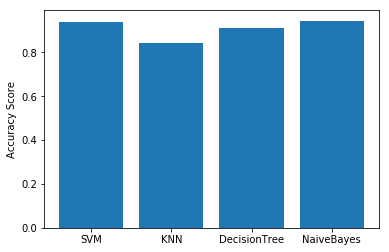

In [34]:
index = np.arange(len(algorithms))
value = [i for i in acc_score]
plt.bar(index, value)
plt.xticks(index, algorithms)
plt.ylabel('Accuracy Score')
plt.show()

# Visualization

# User Input

In [35]:
print(vectorizer.vocabulary_)

{'said': 3563, 'kiss': 2496, 'can': 1261, 'do': 1658, 'the': 4090, 'sound': 3823, 'effects': 1739, 'he': 2193, 'is': 2399, 'gorgeous': 2100, 'man': 2718, 'isn': 2403, 'kind': 2491, 'of': 3030, 'person': 3171, 'who': 4512, 'needs': 2945, 'smile': 3775, 'to': 4157, 'brighten': 1184, 'his': 2239, 'day': 1562, 'lt': 2667, 'gt': 2134, 'ish': 2401, 'minutes': 2812, 'was': 4449, 'ago': 818, 'wtf': 4590, 'bank': 1012, 'granite': 2117, 'issues': 2405, 'strong': 3927, 'buy': 1224, 'explosive': 1829, 'pick': 3190, 'for': 1957, 'our': 3105, 'members': 2778, 'up': 4316, 'over': 3111, '300': 446, 'nasdaq': 2927, 'symbol': 4012, 'cdgt': 1297, 'that': 4087, '00': 0, 'per': 3163, 'free': 1974, 'polyphonic': 3258, 'ringtone': 3513, 'text': 4070, 'super': 3980, '87131': 689, 'get': 2051, 'your': 4641, 'poly': 3253, 'tone': 4172, 'week': 4478, 'now': 3003, '16': 353, 'sn': 3787, 'pobox202': 3237, 'nr31': 3006, '7zs': 625, 'subscription': 3950, '450pw': 520, 'message': 2785, 'thanks': 4083, 'using': 4348, 

In [54]:
text3 = ["FREE !!! iphone model"]
vector = vectorizer.transform(text3)
y_pred = predict(model[0], vector)
y_pred

array([0], dtype=int64)

In [57]:
text = ["Urgent Call 12345 from ur landline!! 1000$ Cash awaits you C23EWRHJ$#"]
vector = vectorizer.transform(text)
for i in range(0,4):
    print("\n")
    print(algorithms[i])
    if(i != 3):   
         y_pred = predict(model[i],vector)
    else:
         y_pred = predict(model[i], vector.toarray())
    print(y_pred)
    print("\n")
    



SVM
[1]




KNN
[0]




DecisionTree
[1]




NaiveBayes
[1]


